In [70]:
#Importando bibliotecas para análise de grafos

import netpixi
import seaborn
from netpixi.integration.gt import *
from regression.integration.gt import *

graph_usRoads = Graph(directed=False) # não-dirigido

Leitura do arquivo para a geração do grafo

In [71]:
with open('./road-usroads.mtx') as file:
    #Pula primeiras 14 linhas para chegar nas linhas com os dados do grafo
    for _ in range(14):
        next(file)
    graph_data = file.readline().split()
    n_nodes = int(graph_data[0])
    n_edges = int(graph_data[2])
    for i in range(n_nodes):
        graph_usRoads.add_vertex(i+1)
    print('número de vértices de graph_usRoads:', graph_usRoads.num_vertices())
    for edges in file:
        edge_data = edges.split()
        graph_usRoads.add_edge(int(edge_data[0]), int(edge_data[1]))
    print('número de arestas de graph_usRoads:', graph_usRoads.num_edges())

número de vértices de graph_usRoads: 129164
número de arestas de graph_usRoads: 165435


In [72]:
n = graph_usRoads.num_vertices()
m = graph_usRoads.num_edges()

#Como sabemos que nosso grafo não é dirigido, podemos usar esta fórmula
max_edges = n * (n - 1) // 2
d = m / max_edges
print('A densidade do grafo é:', d)

A densidade do grafo é: 1.9832514564949666e-05


In [73]:
data = gt_data(graph_usRoads)

In [74]:
in_degrees = []
for v in graph_usRoads.all_vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in graph_usRoads.all_vertices():
    out_degrees.append(v.out_degree())

degrees = []
for v in graph_usRoads.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data

,in_degree,out_degree,degree
id,,,
1,0,1,1
2,0,3,3
3,0,1,1
4,0,3,3
5,0,1,1
...,...,...,...
129160,0,3,3
129161,0,2,2
129162,0,2,2


count    129164.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: in_degree, dtype: float64

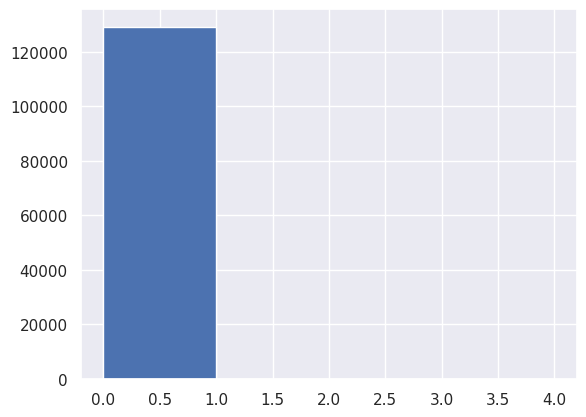

In [75]:
data['in_degree'].hist(bins=range(5))
data['in_degree'].describe()

count    129164.000000
mean          2.561627
std           0.784018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: out_degree, dtype: float64

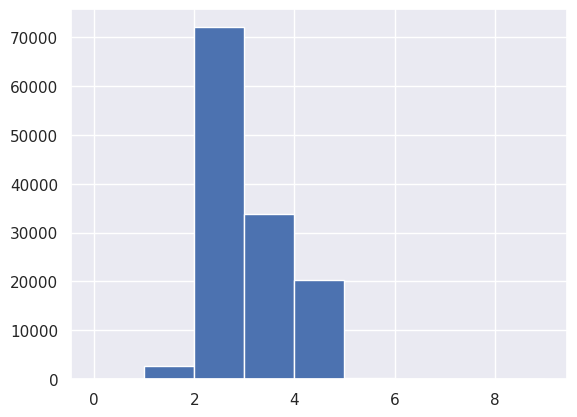

In [76]:
data['out_degree'].hist(bins=range(10))
data['out_degree'].describe()

count    129164.000000
mean          2.561627
std           0.784018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: degree, dtype: float64

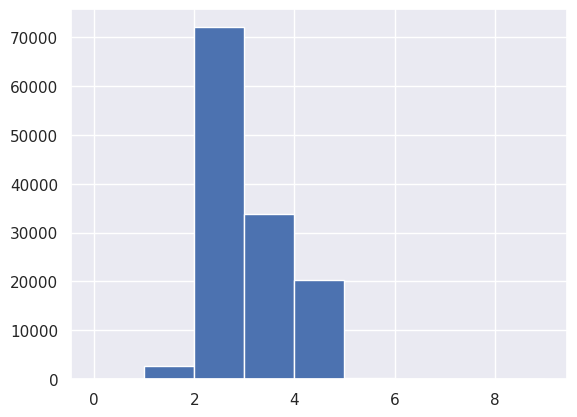

In [77]:
data['degree'].hist(bins=range(10))
data['degree'].describe()

In [79]:
print('número de vértices de graph_usRoads:', graph_usRoads.num_vertices())
print('número de arestas de graph_usRoads:', graph_usRoads.num_edges())

número de vértices de graph_usRoads: 129164
número de arestas de graph_usRoads: 165435


In [80]:
gt_save(graph_usRoads, 'graphUsRoads.net.gz')

In [81]:
g = gt_load('./graphUsRoads.net.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sfdp.net.gz')
netpixi.render('sfdp.net.gz');

In [ ]:
g = gt_load('./graphUsRoads.net.gz')
m = gt_draw.fruchterman_reingold_layout(g)
gt_move(g, m)
gt_save(g, 'fruchterman_reingold_layout.net.gz')
netpixi.render('fruchterman_reingold_layout.net.gz');

In [ ]:
g = gt_load('./graphUsRoads.net.gz')
m = gt_draw.arf_layout(g)
gt_move(g, m)
gt_save(g, 'arf_layout.net.gz')
netpixi.render('arf_layout.net.gz');

In [ ]:
g = gt_load('./graphUsRoads.net.gz')
m = gt_draw.radial_tree_layout(g)
gt_move(g, m)
gt_save(g, 'radial_tree.net.gz')
netpixi.render('radial_tree.net.gz');